In [53]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# import os
# os.environ["CUDA_VISIBLE_DEVICES"]="1"

tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [54]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [55]:
# Get statistics on the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [56]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(6,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature], y=df[label], batch_size=batch_size, epochs=epochs)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse

In [57]:
def plot_the_model2(sample_df):
  # Create a scatter plot from 200 random points of the dataset.
  plt.plot(sample_df["median_house_value"], sample_df["median_house_value"], label="True prices")
  plt.scatter(sample_df["median_house_value"],sample_df["predictions"] , c='r', label="Predicted prices")

  plt.legend()

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

In [58]:
def plot_df_corr(df):
    plt.figure(figsize=(6, 6))

    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="mako")

    plt.show()

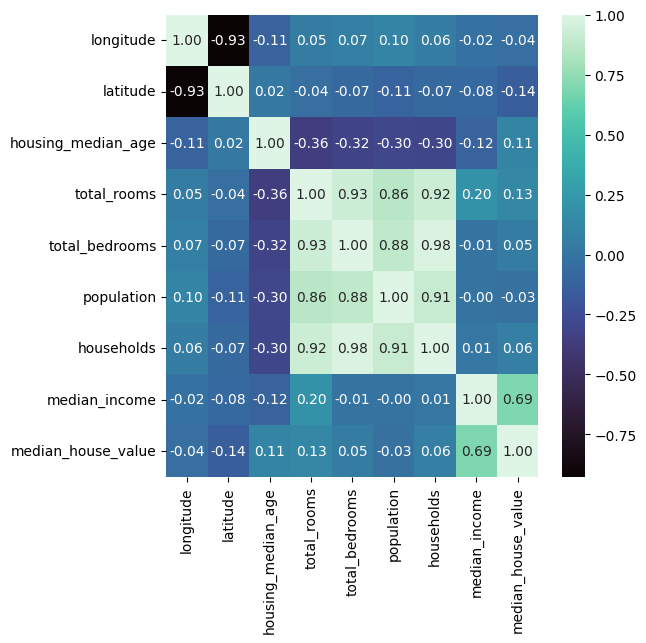

In [59]:
#testing correlations
plot_df_corr(training_df)

In [68]:
# The following variables are the hyperparameters.
learning_rate = 0.005
epoch_count = 20
batch_size = 128

# Specify the feature and the label.
my_feature = ["longitude", "latitude", "total_rooms", "total_bedrooms", "population", "households"]
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Invoke the functions.
my_model = build_model(learning_rate)
epochs, rmse = train_model(my_model, training_df, my_feature, my_label, epoch_count, batch_size)

Epoch 1/20
 20/133 [===>..........................] - ETA: 0s - loss: 101928.1797 - root_mean_squared_error: 319.2619

2023-02-16 00:42:15.276369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


133/133 [==============================] - 1s 5ms/step - loss: 59305.3984 - root_mean_squared_error: 243.5270
Epoch 2/20
133/133 [==============================] - 1s 5ms/step - loss: 26300.2891 - root_mean_squared_error: 162.1736
Epoch 3/20
133/133 [==============================] - 1s 5ms/step - loss: 17871.3086 - root_mean_squared_error: 133.6836
Epoch 4/20
133/133 [==============================] - 1s 5ms/step - loss: 15984.9072 - root_mean_squared_error: 126.4314
Epoch 5/20
133/133 [==============================] - 1s 5ms/step - loss: 15499.1787 - root_mean_squared_error: 124.4957
Epoch 6/20
133/133 [==============================] - 1s 5ms/step - loss: 15047.9355 - root_mean_squared_error: 122.6700
Epoch 7/20
133/133 [==============================] - 1s 5ms/step - loss: 14579.7031 - root_mean_squared_error: 120.7464
Epoch 8/20
133/133 [==============================] - 1s 5ms/step - loss: 14154.2393 - root_mean_squared_error: 118.9716
Epoch 9/20
133/133 [=======================

In [69]:
print("learning rate:", learning_rate, "epochs:", epoch_count, "batch size:", batch_size)

sample_df = training_df.sample(n=200, ignore_index=True)
features = sample_df[my_feature]
predictions = my_model.predict(features).ravel()
sample_df["predictions"] = predictions

sample_df.head()

learning rate: 0.005 epochs: 20 batch size: 128
7/7 [==============================] - 0s 2ms/step


2023-02-16 00:42:42.320373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,predictions
0,-122.5,37.7,49.0,1207.0,255.0,658.0,220.0,4.1,228.6,206.4
1,-120.9,35.7,14.0,5020.0,909.0,2105.0,796.0,3.8,248.7,249.7
2,-121.4,38.6,21.0,2066.0,748.0,2548.0,734.0,1.4,55.0,122.9
3,-121.5,38.6,52.0,3420.0,555.0,1301.0,530.0,4.0,173.8,253.3
4,-119.7,36.4,38.0,3148.0,568.0,1378.0,537.0,2.9,85.5,232.7


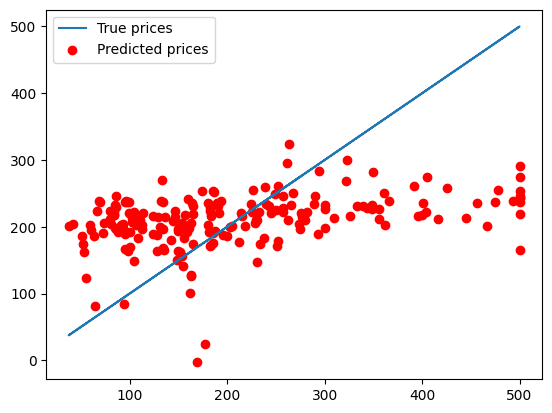

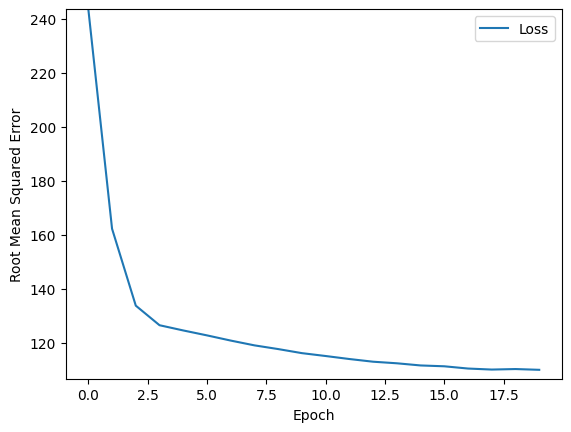

In [70]:
plot_the_model2(sample_df)
plot_the_loss_curve(epochs, rmse)

In [72]:
my_model.get_metrics_result()

AttributeError: 'Sequential' object has no attribute 'get_metrics_result'